#### Assignment 2

### Students have to create the dataset with null values, outliers and inconsistancies. Here existing dataset from kaggle is used and modiefied.
##### Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
   1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
   2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
   3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
 
Reason and document your approach properly.

### Dataset description
This dataset contains marks of students in math, reading and writing. The main objective of analyzing this data is to understand which factors influence students performance the most. The variables considered are race, the level of education of the parents, diet and the way in which the students prepared for the exams.

This dataset is composed of the following variables:

    gender: Male or female.
    race/ethnicity: Grouped from A to E.
    parental level of education: Grouped from high school to master's degree.
    lunch: Type of lunch (standard or reduced).
    test preparation course: If a student did the test preparation course before the exams.
    math score
    reading score
    writing score


## Import Libraries

In [58]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

## Load and review data

In [59]:
dataset = pd.read_csv("StudentsPerformance_modified.csv")  
dataset.shape

(1000, 8)

In [60]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [61]:
dataset.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [62]:
dataset.rename(columns={'math score':'Math_score'}, inplace=True)

In [63]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [64]:
mathIsDigit = pd.DataFrame(dataset.Math_score.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
dataset[mathIsDigit['Math_score'] == False]   # from temp take only those rows where hp has false


,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
432,male,group C,high school,standard,none,?,56.0,55.0
433,female,group A,some high school,free/reduced,none,?,59.0,50.0
434,male,group C,some high school,standard,none,?,66.0,66.0
435,male,group C,some college,free/reduced,completed,?,48.0,53.0
436,male,group D,associate's degree,standard,none,?,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,?,66.0,73.0
438,male,group C,high school,standard,none,?,56.0,51.0
439,male,group D,some high school,standard,completed,?,88.0,82.0
440,female,group C,some college,standard,completed,?,81.0,79.0
441,female,group D,high school,standard,none,?,81.0,80.0


In [66]:
# Missing values have a'?''
# Replace missing values with NaN
dataset = dataset.replace('?', np.nan)
dataset[mathIsDigit['Math_score'] == False] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
432,male,group C,high school,standard,none,NaN,56.0,55.0
433,female,group A,some high school,free/reduced,none,NaN,59.0,50.0
434,male,group C,some high school,standard,none,NaN,66.0,66.0
435,male,group C,some college,free/reduced,completed,NaN,48.0,53.0
436,male,group D,associate's degree,standard,none,NaN,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,NaN,66.0,73.0
438,male,group C,high school,standard,none,NaN,56.0,51.0
439,male,group D,some high school,standard,completed,NaN,88.0,82.0
440,female,group C,some college,standard,completed,NaN,81.0,79.0
441,female,group D,high school,standard,none,NaN,81.0,80.0


In [67]:
labelencoder = LabelEncoder()
dataset_new = dataset.copy()
dataset_new["parental level of education"] = labelencoder.fit_transform(dataset_new["parental level of education"])
dataset_new["test preparation course"] = labelencoder.fit_transform(dataset_new["test preparation course"])
dataset_new["lunch"] = labelencoder.fit_transform(dataset_new["lunch"])
dataset_new.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
0,female,group B,1,1,1,72,72.0,74.0
1,female,group C,4,1,0,69,90.0,88.0
2,female,group B,3,1,1,90,95.0,93.0
3,male,group A,0,0,1,47,57.0,44.0
4,male,group C,4,1,1,76,78.0,75.0


In [68]:
dataset_new.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
Math_score                     43
reading score                   6
writing score                   9
dtype: int64

In [69]:
import missingno as msno

<AxesSubplot:>

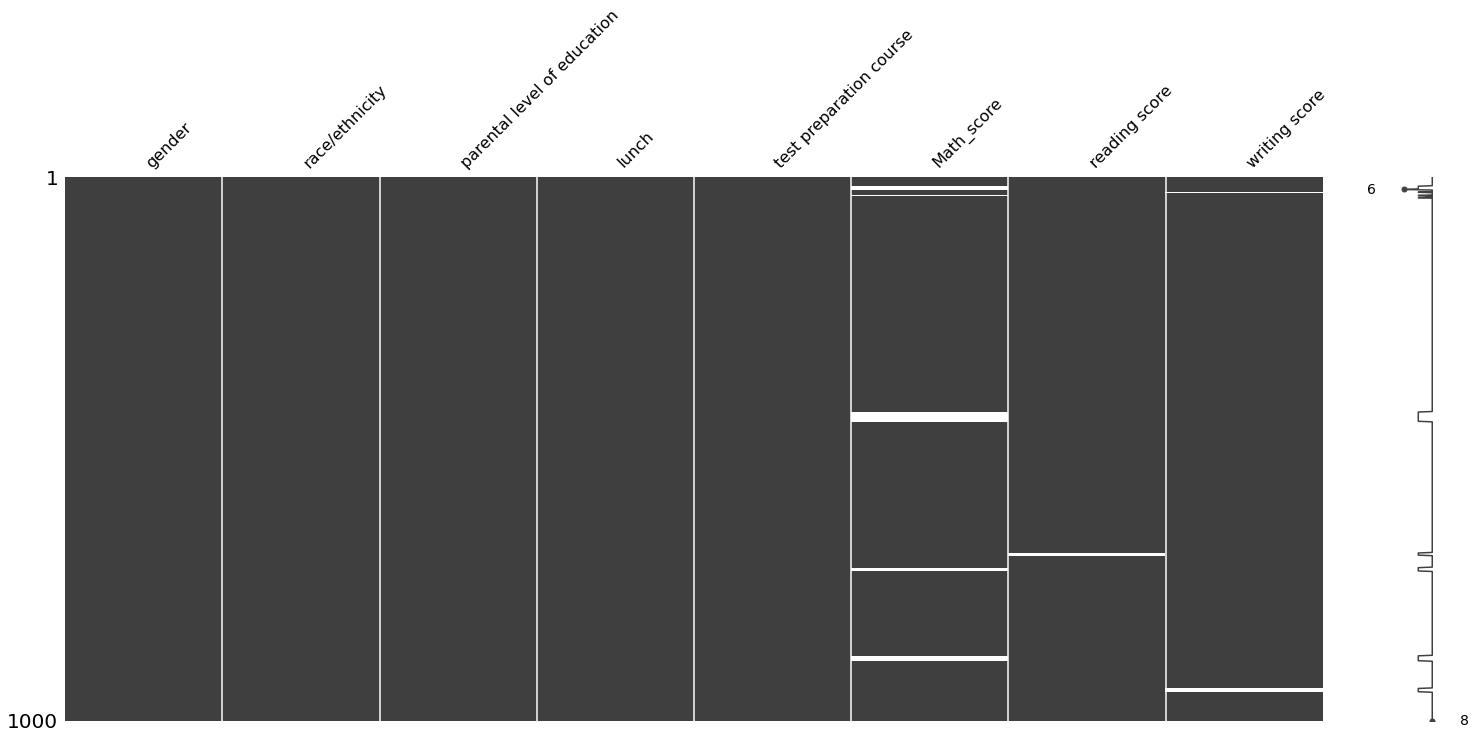

In [70]:
msno.matrix(dataset_new)

In [71]:
dataset_new.describe()

,parental level of education,lunch,test preparation course,reading score,writing score
count,1000.000000,1000.000000,1000.000000,994.000000,991.000000
mean,2.486000,0.645000,0.642000,68.008048,69.487386
std,1.829522,0.478753,0.479652,16.602270,29.563757
min,0.000000,0.000000,0.000000,3.000000,10.000000
25%,1.000000,0.000000,0.000000,58.000000,57.000000
50%,2.000000,1.000000,1.000000,69.500000,69.000000
75%,4.000000,1.000000,1.000000,79.000000,79.000000
max,5.000000,1.000000,1.000000,100.000000,567.000000


In [81]:
dataset_new["Math_score"].str.isdigit().count()

957

In [78]:
dataset_new.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
Math_score                      object
reading score                  float64
writing score                  float64
dtype: object

In [83]:
numeric_cols = ['test preparation course','Math_score','reading score','writing score']
medianFiller = lambda x: x.fillna(x.median())
dataset_new[numeric_cols] = dataset_new[numeric_cols].apply(medianFiller,axis=0)

dataset_new['Math_score'] = dataset_new['Math_score'].astype('float64')  # converting the column from object / string type to float


In [84]:
dataset_new.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
Math_score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [136]:
dataset_new.describe()

,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.486000,0.645000,0.642000,66.310000,68.01700,69.483000
std,1.829522,0.478753,0.479652,17.882497,16.55274,29.430322
min,0.000000,0.000000,0.000000,-89.000000,3.00000,10.000000
25%,1.000000,0.000000,0.000000,57.000000,58.00000,58.000000
50%,2.000000,1.000000,1.000000,66.000000,69.50000,69.000000
75%,4.000000,1.000000,1.000000,76.000000,79.00000,79.000000
max,5.000000,1.000000,1.000000,334.000000,100.00000,567.000000


/home/lenovo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

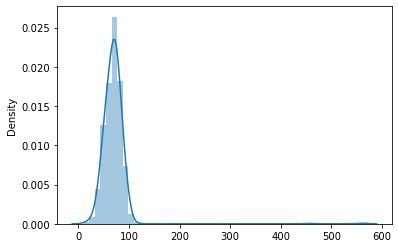

In [85]:
sns.distplot(dataset_new[["writing score"]])

/home/lenovo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

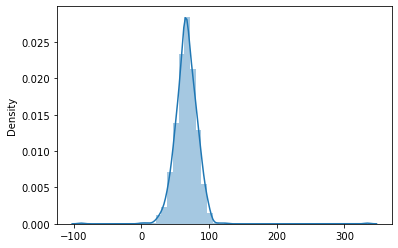

In [87]:
sns.distplot(dataset_new[["Math_score"]])

/home/lenovo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

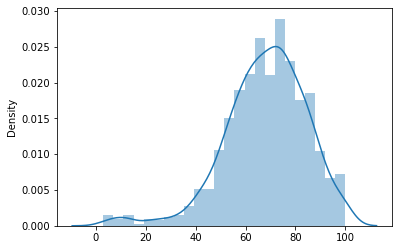

In [88]:
sns.distplot(dataset_new[["reading score"]])

In [23]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

train_df[['writing score']] = s.fit_transform(train_df[['writing score']])

/home/lenovo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

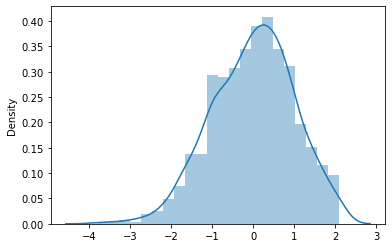

In [24]:
sns.distplot(train_df[["writing score"]])

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
    In statistics, an outlier is an observation point that is distant from other observations.
    An outlier is defined as being any point of data that lies over 1.5 IQRs below the first quartile (Q1) or above the third quartile (Q3)in a data set.

##### IQR Score 

    Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
##### Definition
    The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
    In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
    It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
    IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

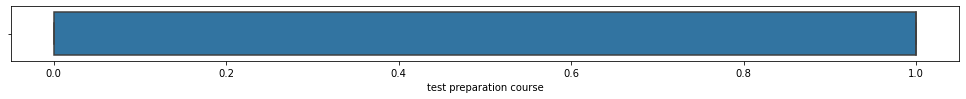

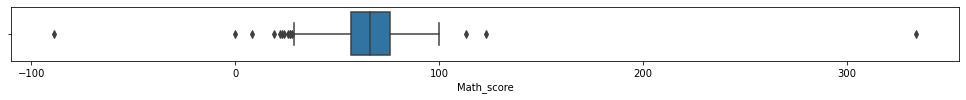

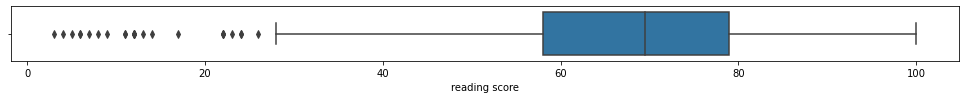

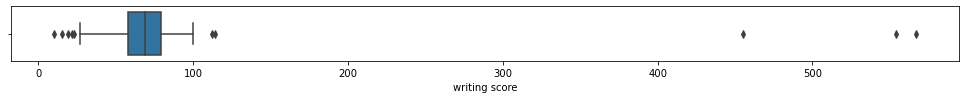

In [118]:
for column in numeric_cols:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=dataset_new, x=column)

In [157]:
#dataset_new.boxplot()

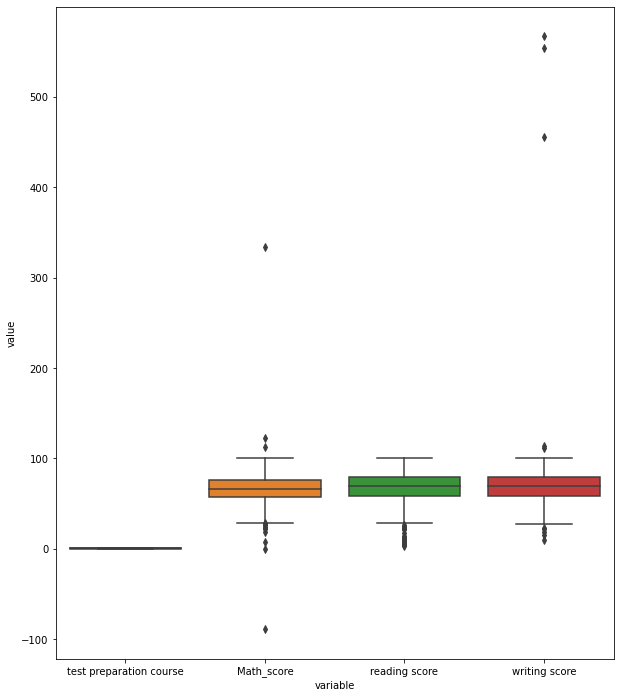

In [161]:
plt.figure(figsize=(10,12))
sns.boxplot(x="variable", y="value", data=pd.melt(dataset_new[numeric_cols]))

plt.show()

In [119]:
Q1 = dataset_new.quantile(0.25)
Q3 = dataset_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


parental level of education     3.0
lunch                           1.0
test preparation course         1.0
Math_score                     19.0
reading score                  21.0
writing score                  21.0
dtype: float64


In [124]:
low = Q1 - 1.5 * IQR
high = Q3+1.5*IQR
print(low,high)

parental level of education    -3.5
lunch                          -1.5
test preparation course        -1.5
Math_score                     28.5
reading score                  26.5
writing score                  26.5
dtype: float64 parental level of education      8.5
lunch                            2.5
test preparation course          2.5
Math_score                     104.5
reading score                  110.5
writing score                  110.5
dtype: float64


    Working with Outliers: Correcting, Removing
    During data analysis when you detect the outlier one of most difficult decision could be how one should deal with the outlier.

### 1. using Zscore to remove outliers

In [128]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset_new[numeric_cols]))
print(z)
threshold = 3
print(np.where(z > 3))

[[0.74674788 0.31834745 0.24074522 0.15355796]
 [1.33914006 0.15050169 1.32872259 0.62949585]
 [0.74674788 1.32542197 1.63093853 0.79947366]
 ...
 [1.33914006 0.40898415 0.18030203 0.15240211]
 [1.33914006 0.09455311 0.60340434 0.25554465]
 [0.74674788 0.59809037 1.08694984 0.56150472]]
(array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  59,  59, 431, 456, 474, 542, 591, 651, 980]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 3,
       3, 3, 1]))


In [153]:
dataset_new_1 = dataset_new[(z < 3).all(axis=1)]
print(dataset_new.shape,dataset_new_1.shape)

(1000, 8) (976, 8)


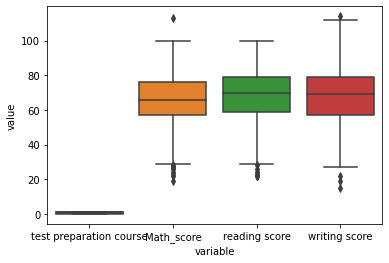

In [155]:
sns.boxplot(x="variable", y="value", data=pd.melt(dataset_new_1[numeric_cols]))

plt.show()

### 2. Using IQR to remove outliers

In [142]:
# IQR Score -
# we can use previously calculated IQR score to filter out the outliers by keeping only valid values.
dataset_new_2 = dataset_new[~((dataset_new < low) |(dataset_new > high)).any(axis=1)]
print(dataset_new.shape,dataset_new_2.shape)

(1000, 8) (960, 8)


/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


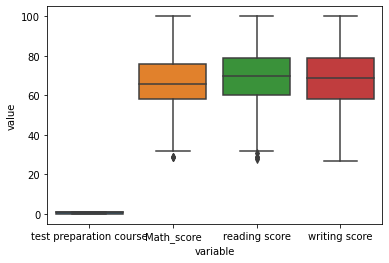

In [151]:
plt.figsize=(8,16)
sns.boxplot(x="variable", y="value", data=pd.melt(dataset_new_2[numeric_cols]))

plt.show()

In [91]:
#sns.pairplot(dataset_new[numeric_cols], diag_kind='kde') 

### 3. Apply data transformations on at least one of the variables. 
    The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1] . Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

If there are outliers, use RobustScaler(). Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed)



### Using The min-max feature scaling
The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.


In [131]:
dataset_new.describe()

,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.486000,0.645000,0.642000,66.310000,68.01700,69.483000
std,1.829522,0.478753,0.479652,17.882497,16.55274,29.430322
min,0.000000,0.000000,0.000000,-89.000000,3.00000,10.000000
25%,1.000000,0.000000,0.000000,57.000000,58.00000,58.000000
50%,2.000000,1.000000,1.000000,66.000000,69.50000,69.000000
75%,4.000000,1.000000,1.000000,76.000000,79.00000,79.000000
max,5.000000,1.000000,1.000000,334.000000,100.00000,567.000000


In [138]:
from sklearn.preprocessing import MinMaxScaler
df_min_max_scaled = dataset_new.copy()
  
# apply normalization techniques
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(dataset_new[numeric_cols].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()


Scaled Dataset Using MinMaxScaler


,test preparation course,Math_score,reading score,writing score
0,1.0,0.380615,0.711340,0.114901
1,0.0,0.373522,0.896907,0.140036
2,1.0,0.423168,0.948454,0.149013
3,1.0,0.321513,0.556701,0.061041
4,1.0,0.390071,0.773196,0.116697


### Standardization
    Standardization doesn’t have any fixed minimum or maximum value. Here, the values of all the columns are scaled in such a way that they all have a mean equal to 0 and standard deviation equal to 1. This scaling technique works well with outliers. Thus, this technique is preferred if outliers are present in the dataset. 

In [140]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_std_scaled = std_scaler.fit_transform(dataset_new[numeric_cols].to_numpy())
df_std_scaled = pd.DataFrame(df_std_scaled, columns=numeric_cols)
 
print("Scaled Dataset Using StandardScaler")
df_std_scaled.head()

Scaled Dataset Using StandardScaler


,test preparation course,Math_score,reading score,writing score
0,0.746748,0.318347,0.240745,0.153558
1,-1.339140,0.150502,1.328723,0.629496
2,0.746748,1.325422,1.630939,0.799474
3,0.746748,-1.080367,-0.665903,-0.866309
4,0.746748,0.542142,0.603404,0.187554
